In [1]:
# Loading all the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
# Storing the IPL Matches and Deliveries dataset into variables

matches = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\matches.csv')
deliveries = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\deliveries.csv')
most_runs_average_strikerate = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\most_runs_average_strikerate.csv')
teamwise_home_and_away = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\teamwise_home_and_away.csv')
players = pd.read_csv(r'C:\Users\Chetan\Desktop\College\Python\IPL_EDA\players.csv')

Text(0, 0.5, 'Matches Played')

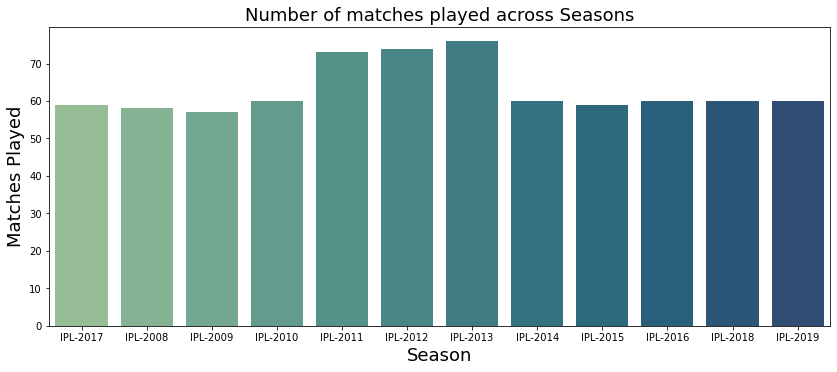

In [3]:
#Plotting the number of matches played in each season of IPL chronologically

plt.subplots(figsize=(14,5.5))
sns.countplot(x ='Season', data = matches, palette = sns.color_palette('crest',13))  
plt.title("Number of matches played across Seasons", fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Matches Played', fontsize = 18)

Text(0, 0.5, 'Total Runs Scored')

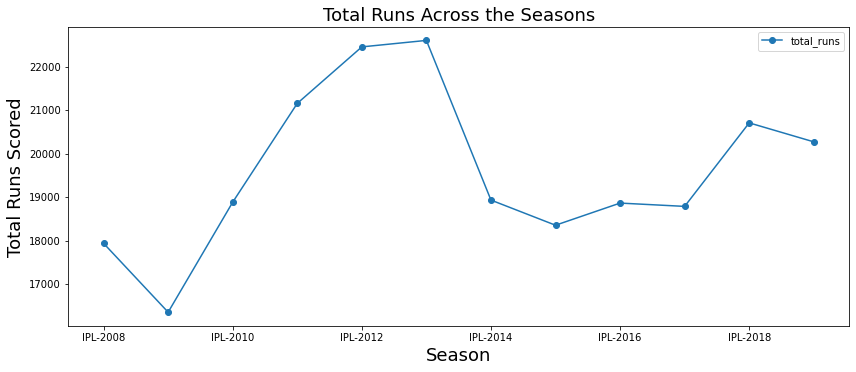

In [6]:
batsmen = matches[['id','Season']].merge(deliveries, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
season=batsmen.groupby(['Season'])['total_runs'].sum().reset_index()
season.set_index('Season').plot(marker='o')
plt.gcf().set_size_inches(14,5.5)
plt.title('Total Runs Across the Seasons', fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Total Runs Scored', fontsize = 18)

Total count for toss carried out :  756
Total times batting was selected :  293
Total times fielding was selected:  463
Percentage of selecting batting  :  38.75661375661375
Percentage of selecting bowling  :  61.24338624338625


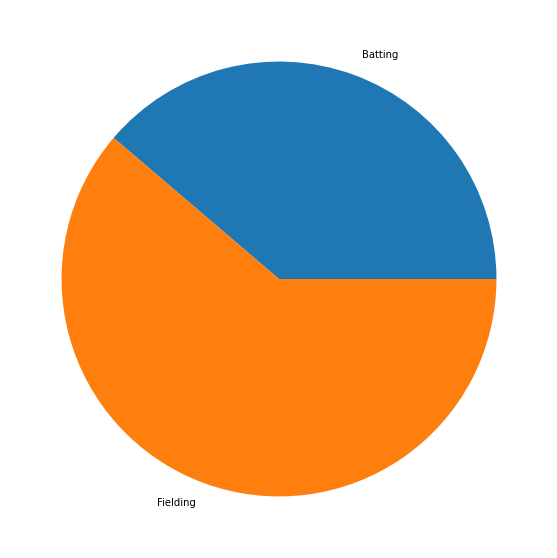

In [13]:
# Information related to the decision that toss winning team made

plt.subplots(figsize = (10,10))

bat_num = matches.loc[matches['toss_decision'] == 'bat', 'toss_decision'].count()
fie_num = matches.loc[matches['toss_decision'] == 'field', 'toss_decision'].count()
total_num = bat_num + fie_num
bat_per = (bat_num / total_num) * 100
fie_per = (fie_num / total_num) * 100
choice = ['Batting', 'Fielding']
data_choice =[bat_num, fie_num] 
plt.pie(data_choice, labels = choice)

print('Total count for toss carried out : ', total_num)
print('Total times batting was selected : ', bat_num)
print('Total times fielding was selected: ', fie_num)
print('Percentage of selecting batting  : ', bat_per)
print('Percentage of selecting bowling  : ', fie_per)

Text(0, 0.5, 'Count')

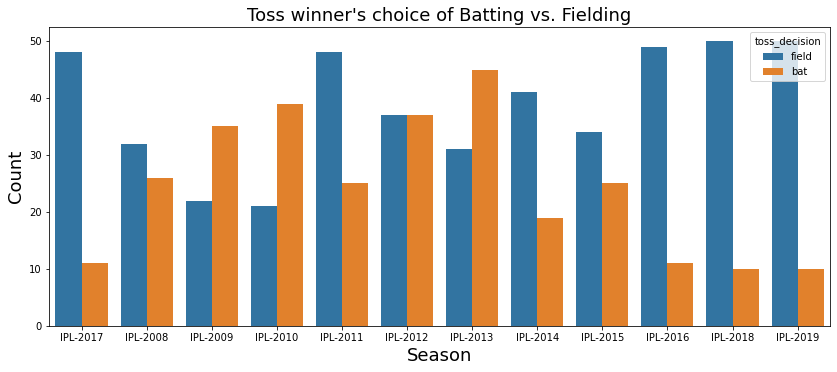

In [19]:
# Information related to the decision that toss winning team made, year wise

plt.subplots(figsize=(14,5.5))
sns.countplot(x='Season',hue='toss_decision',data=matches)
plt.title("Toss winner's choice of Batting vs. Fielding", fontsize = 18)
plt.xlabel('Season', fontsize = 18)
plt.ylabel('Count', fontsize = 18)

Text(0, 0.5, 'Team Name')

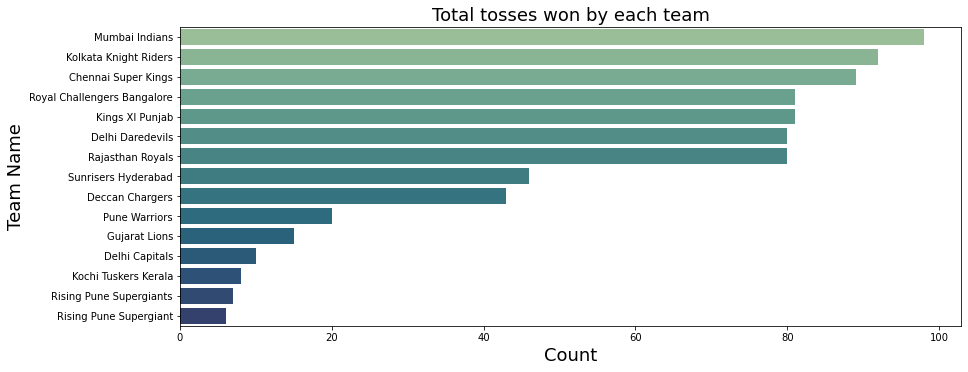

In [18]:
#Plot to show which team won the toss how many times

plt.subplots(figsize=(14,5.5))
sns.countplot(y = matches['toss_winner'], order=matches['toss_winner'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',15))

plt.title('Total tosses won by each team', fontsize = 18)
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Team Name', fontsize = 18)

Text(0, 0.5, 'Name of Country')

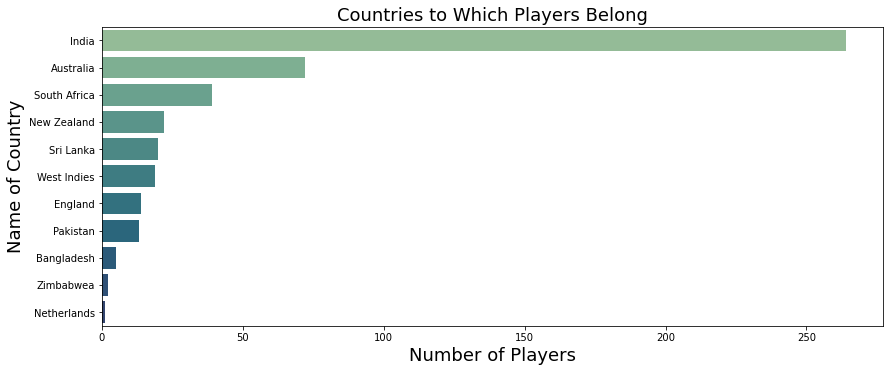

In [23]:
# Information about the countries to which the players belong

plt.subplots(figsize=(14,5.5))
sns.countplot(y = players['Country'], order=players['Country'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',11))
plt.title('Countries to Which Players Belong', fontsize = 18)
plt.xlabel('Number of Players', fontsize = 18)
plt.ylabel('Name of Country', fontsize = 18)

Text(0, 0.5, 'Name of Stadium')

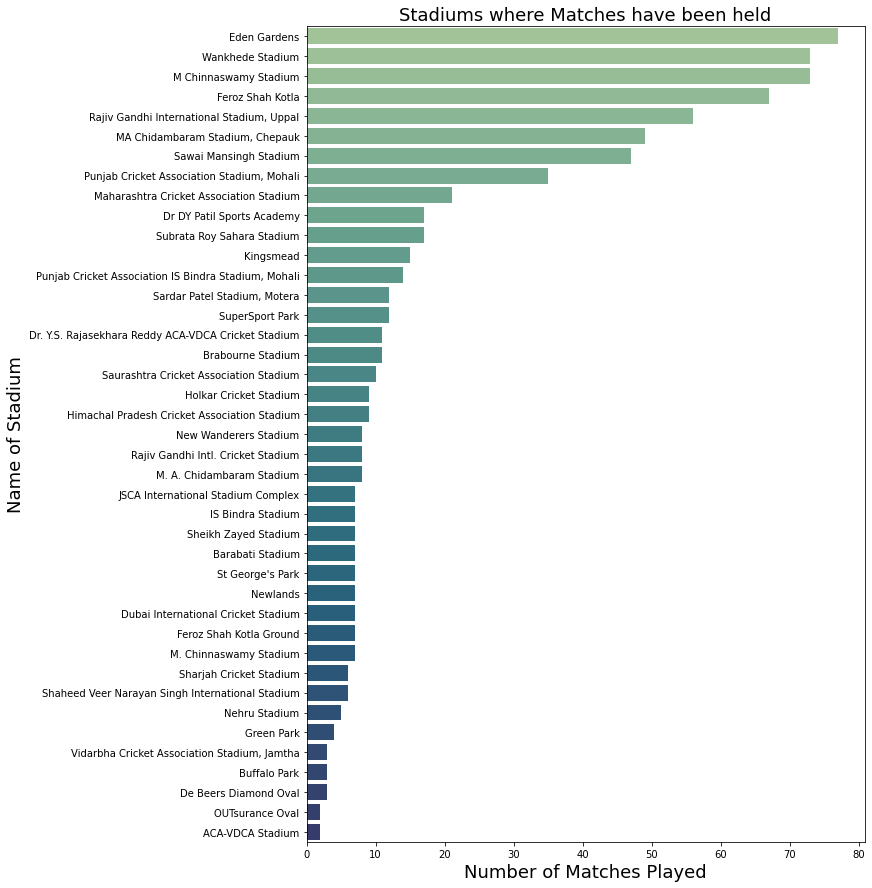

In [26]:
# Information about Stadiums at which matches were played

plt.subplots(figsize=(10,15))
sns.countplot(y = matches['venue'], order=matches['venue'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',41))

plt.title('Stadiums where Matches have been held', fontsize = 18)
plt.xlabel('Number of Matches Played', fontsize = 18)
plt.ylabel('Name of Stadium', fontsize = 18)

In [27]:
# Information about Umpires

print("No. of Umpires 1: ",matches['umpire1'].nunique())
print("No. of Umpires 2: ",matches['umpire2'].nunique())
print("No. of Umpires 3: ",matches['umpire3'].nunique())

u_set1 = set(matches['umpire1'].unique())               
u_set2 = set(matches['umpire2'].unique())
u_set3 = set(matches['umpire3'].unique())
all_ump = u_set1.intersection(u_set2)
all_ump = all_ump.intersection(u_set3)
print("Umpires who umpired as 1st,2nd and 3rd umpires: ",all_ump, len(all_ump))

No. of Umpires 1:  61
No. of Umpires 2:  65
No. of Umpires 3:  25
Umpires who umpired as 1st,2nd and 3rd umpires:  {nan, 'Ian Gould', 'Bruce Oxenford', 'Anil Dandekar', 'KN Ananthapadmanabhan', 'Nanda Kishore', 'Yeshwant Barde', 'A Nanda Kishore', 'Ulhas Gandhe', 'C Shamshuddin', 'Rod Tucker', 'K Ananthapadmanabhan', 'Chris Gaffaney', 'Nitin Menon', 'O Nandan', 'Anil Chaudhary', 'Kumar Dharmasena', 'S Ravi', 'Nigel Llong', 'Vineet Kulkarni'} 20


Text(0.5, 1.0, 'Umpires-1 who have umpired most (from highest to lowest)')

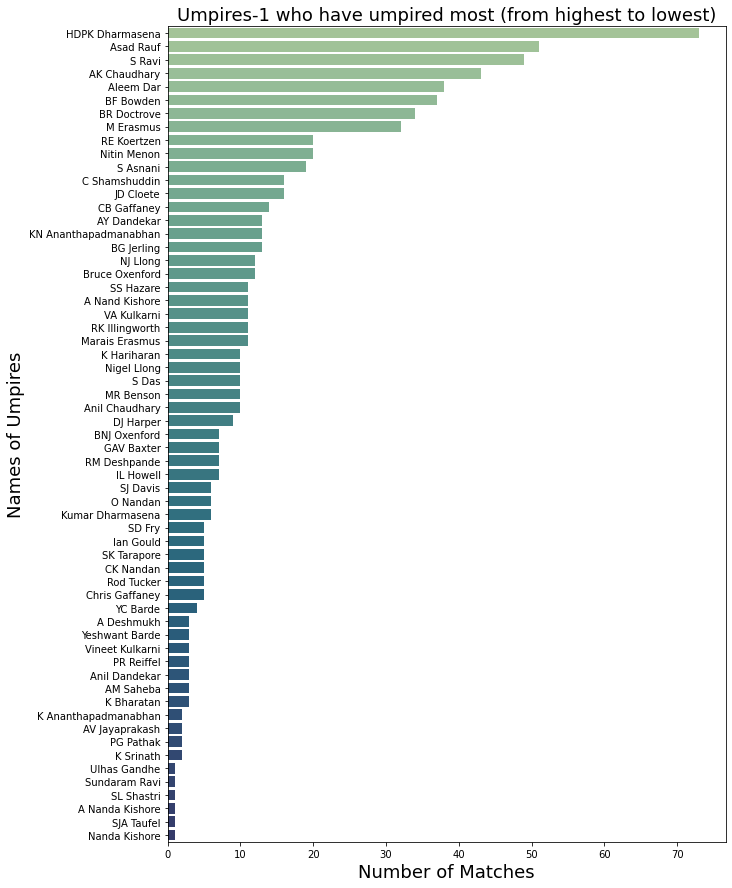

In [29]:
# Information about 1st Umpires

plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire1'], order=matches['umpire1'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',61))

plt.xlabel("Number of Matches", fontsize=18)
plt.ylabel("Names of Umpires", fontsize=18)
plt.title("Umpires-1 who have umpired most (from highest to lowest)", fontsize=18)

Text(0.5, 1.0, 'Umpires-2 who have umpired most (from highest to lowest)')

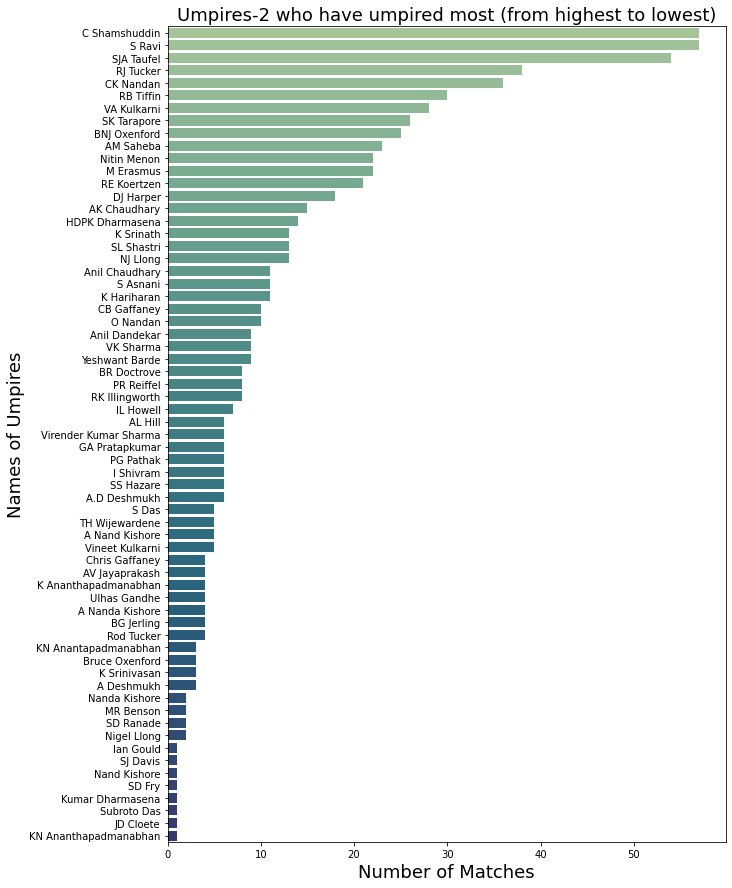

In [32]:
# Information about 2nd Umpires

plt.subplots(figsize = (10, 15))

sns.countplot(y = matches['umpire2'], order=matches['umpire2'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest', 65))

plt.xlabel("Number of Matches", fontsize = 18)
plt.ylabel("Names of Umpires", fontsize = 18)
plt.title("Umpires-2 who have umpired most (from highest to lowest)", fontsize = 18)

Text(0.5, 1.0, 'Umpires-3 who have umpired most (from highest to lowest)')

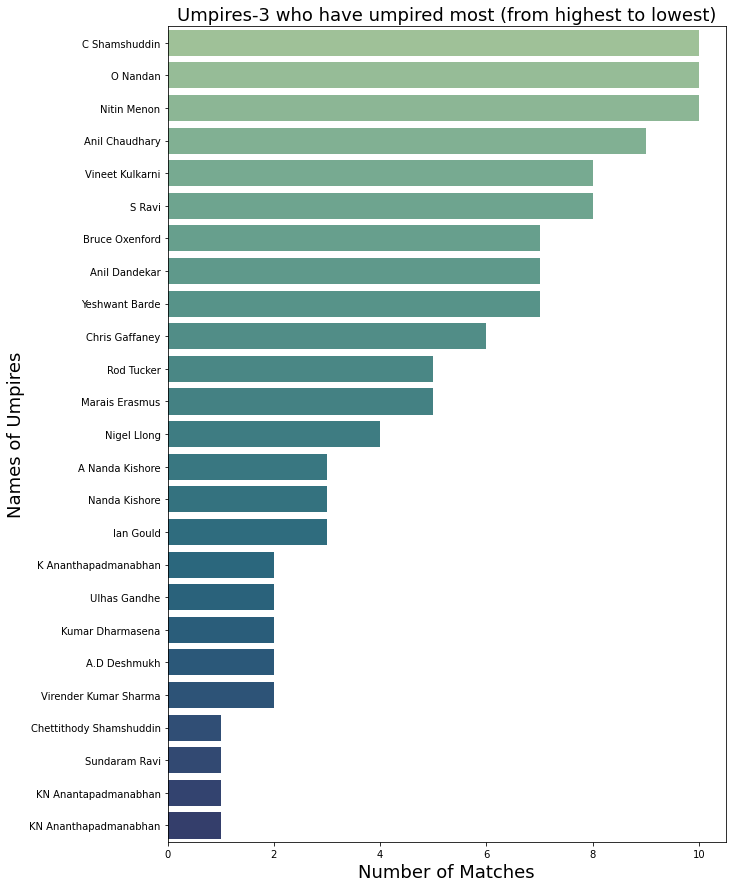

In [33]:
# Information about 3rd Umpires

plt.subplots(figsize=(10,15))

sns.countplot(y = matches['umpire3'], order=matches['umpire3'].value_counts().sort_values(ascending = False).index, palette = sns.color_palette('crest',25))

plt.xlabel("Number of Matches", fontsize = 18)
plt.ylabel("Names of Umpires", fontsize = 18)
plt.title("Umpires-3 who have umpired most (from highest to lowest)", fontsize=18)